In [2]:
import os
os.getcwd()

'C:\\Users\\deepak\\Downloads\\Time Series Forecasting\\day 1'

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Air passengers - 

In [7]:
df = pd.read_csv('AirPassenger.csv',parse_dates = ['Year-Month']) 
# df = pd.read_csv('AirPassenger.csv',parse_dates = ['Year-Month'],index_col='date') 
# to convert Year-Month in datetime format
df.head()

,Year-Month,Pax
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
df.dtypes

Year-Month    datetime64[ns]
Pax                    int64
dtype: object

In [30]:
df.isnull().sum()

Pax    0
dtype: int64

In [11]:
# It is recommended that we make our time series refrences as the index-
df = df.set_index(['Year-Month'])
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [15]:
# we can do slicing i.e. obtain data from specific time period
df['1949-05-01':'1955-05-01']

,Pax
Year-Month,
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136
...,...
1955-01-01,242
1955-02-01,233
1955-03-01,267


In [16]:
# At what date how many passengers travel-
df.loc['1955-05-01']

Pax    270
Name: 1955-05-01 00:00:00, dtype: int64

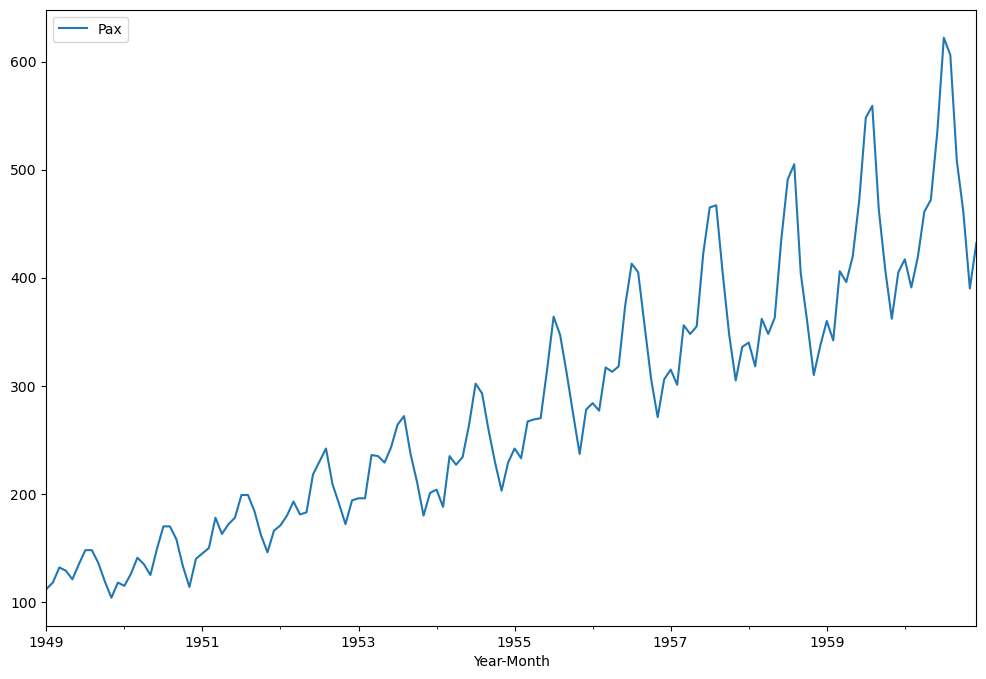

<Figure size 1200x1000 with 0 Axes>

In [20]:
# plot time series -
df.plot()
plt.figure(figsize=(12,10))
plt.show()

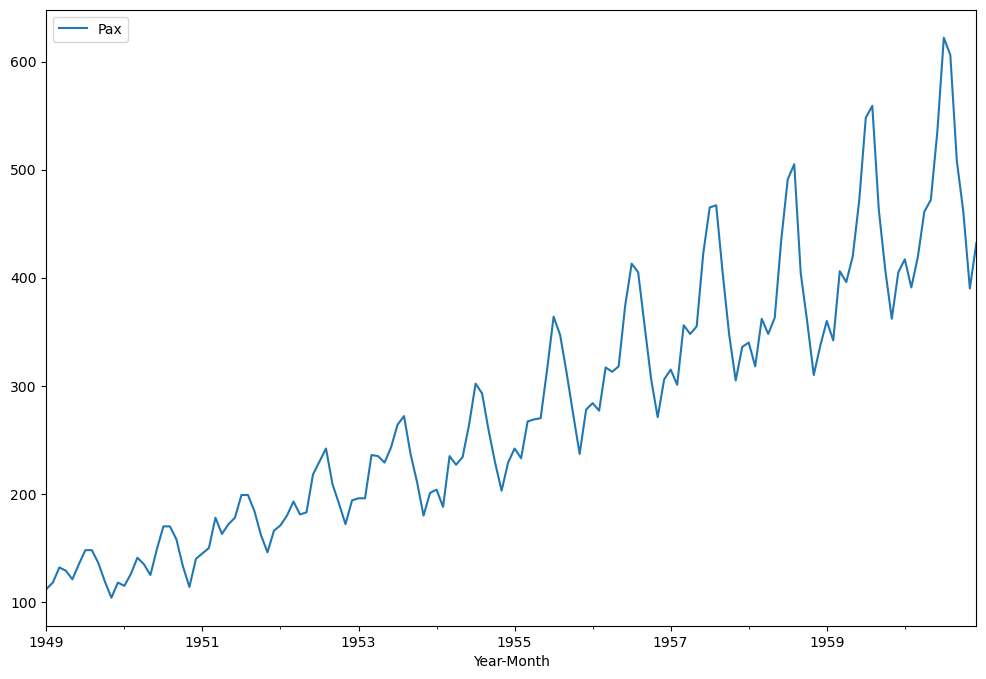

In [18]:
# increase figure size-
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
df.plot()
plt.show()

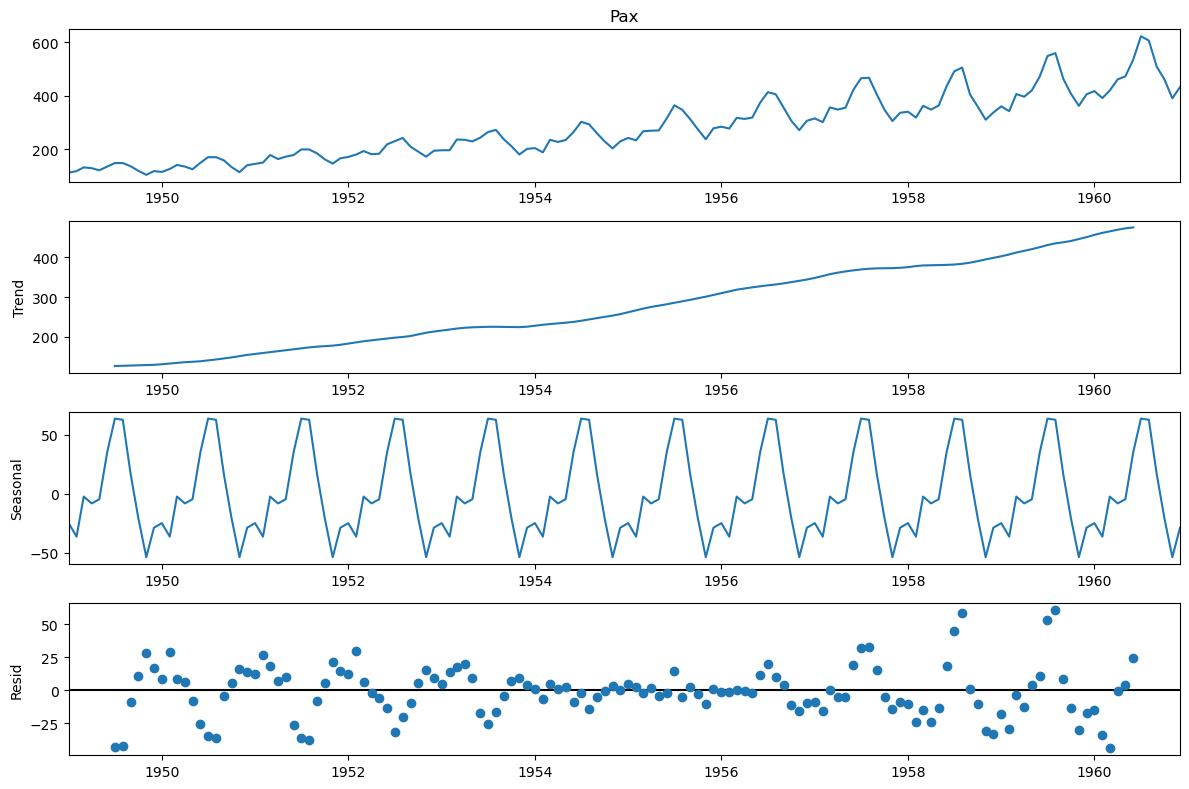

In [21]:
# Decompose to see the complete observation/component-
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Pax'],period=12)
decompose.plot()
plt.show()

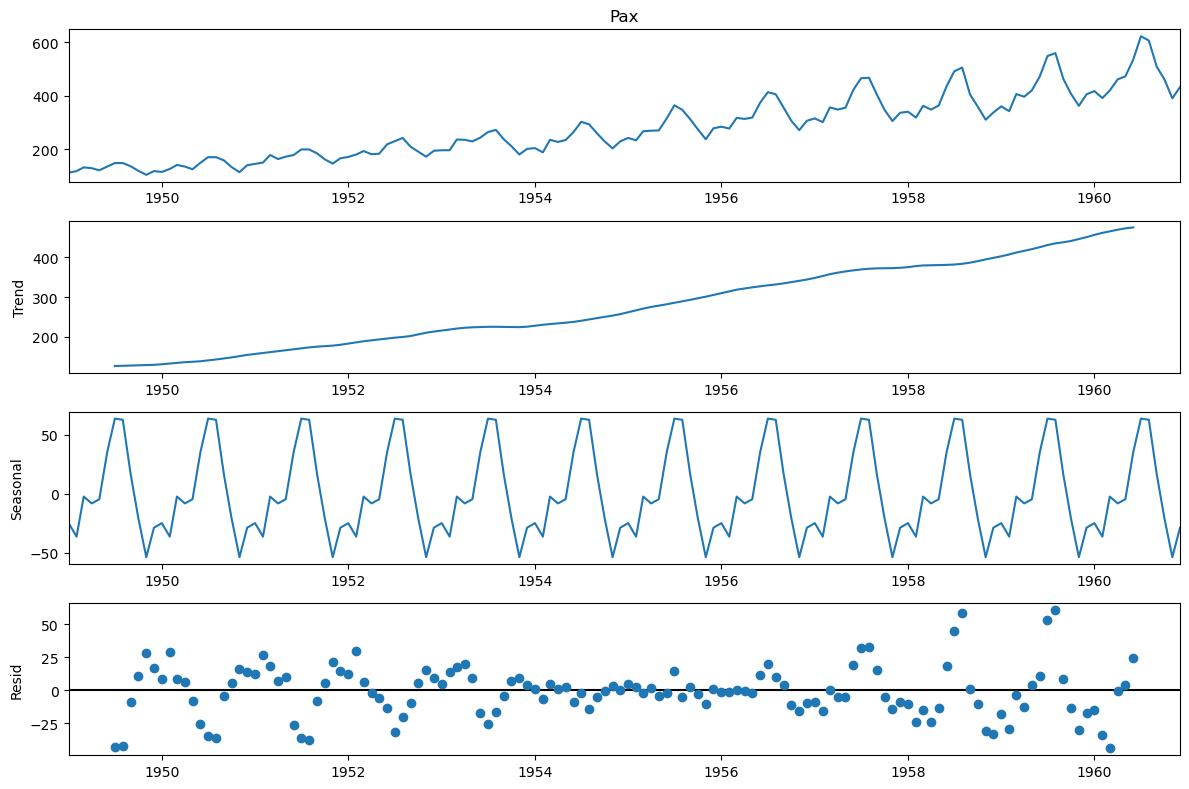

In [22]:
# tsf with additive model -
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Pax'],model='additive',period=12)
decompose.plot()
plt.show()

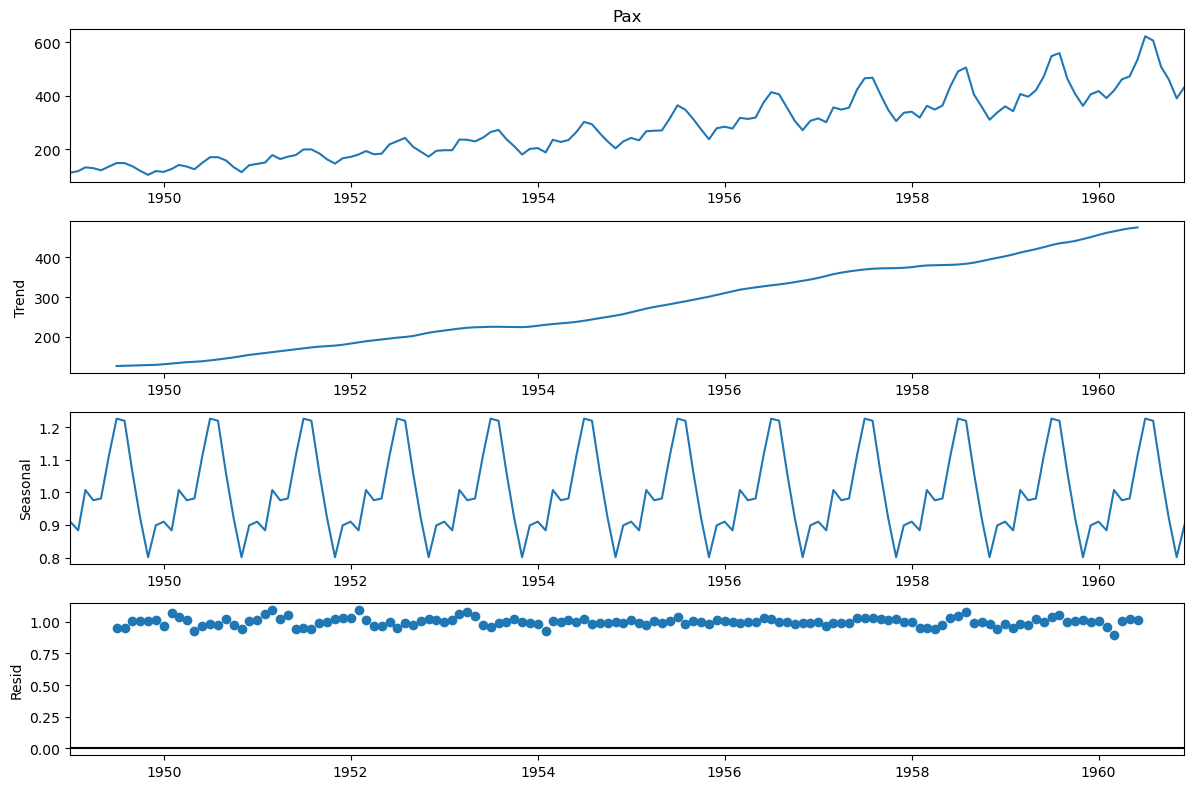

In [23]:
# tsf with multiplicative model -
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Pax'],model='multiplicative',period=12)
decompose.plot()
plt.show()

In [ ]:
# check autocorrelation - 
import statsmodels.api as sm
sm.stats.durbin_watson(df['Thousands of Passengers'])

In [24]:
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [25]:
# log transformation - 
df['Pax'] = np.log(df['Pax'])

In [26]:
df.head()

,Pax
Year-Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


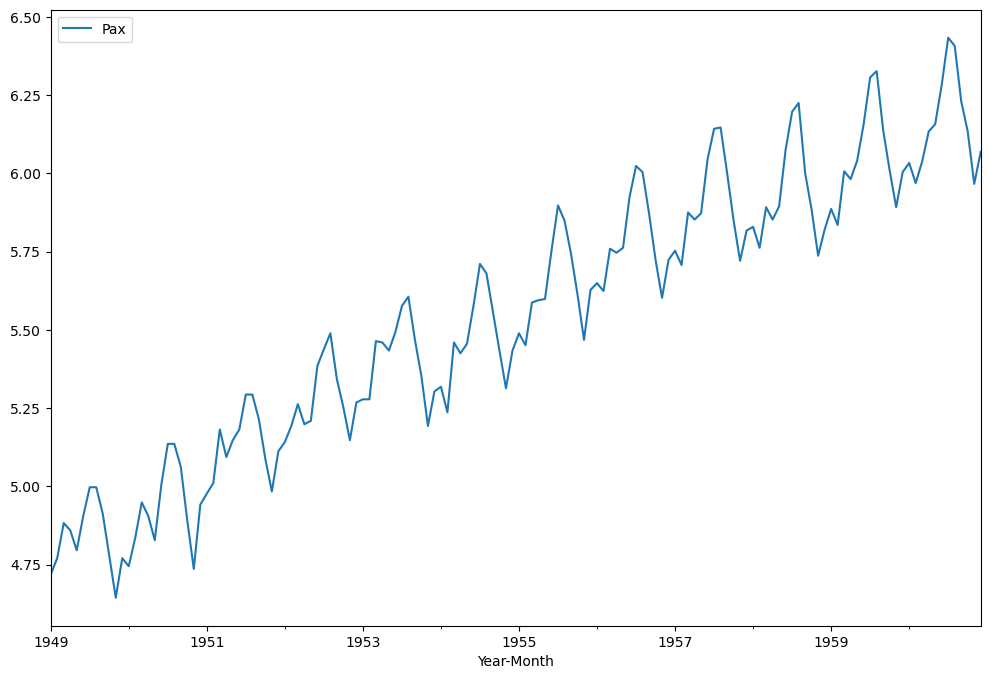

In [27]:
df.plot()
plt.show()

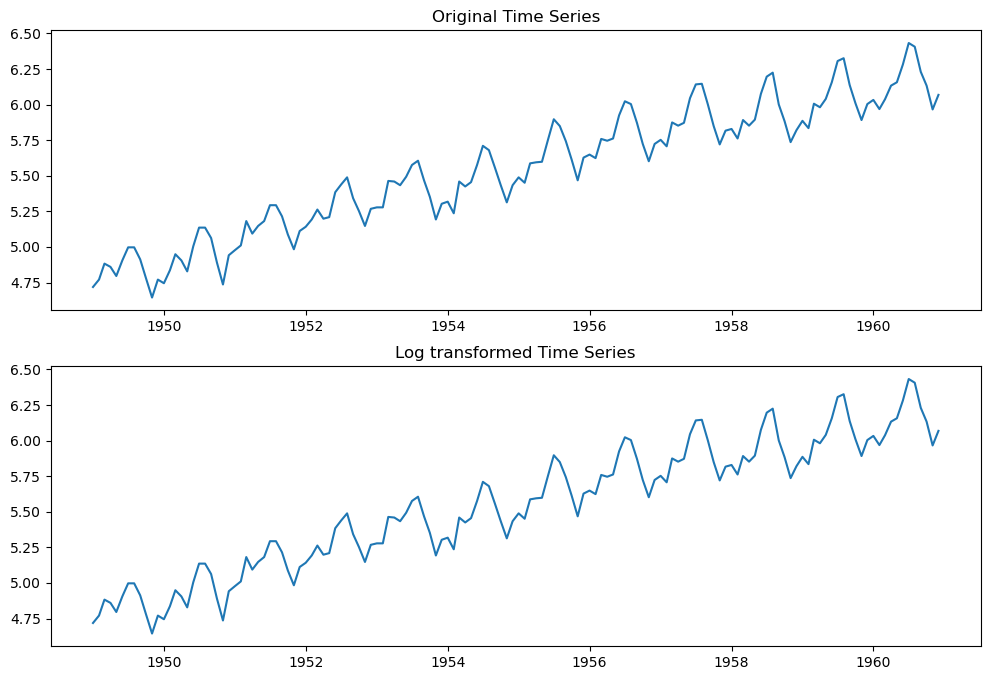

In [28]:
# comparing with original series-
# lol i log transformed on same df-
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df)
plt.subplot(2,1,2)
plt.title('Log transformed Time Series')
plt.plot(df)

### Beer Australia - 

In [56]:
df2 = pd.read_csv('Beer Australia.csv',parse_dates = ['Month'])
df2.head()

,Month,Monthly beer production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9


In [57]:
df2.dtypes

Month                      datetime64[ns]
Monthly beer production           float64
dtype: object

In [58]:
df2.isnull().sum()

Month                      0
Monthly beer production    0
dtype: int64

In [59]:
df2 = df2.set_index(['Month'])
df2.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


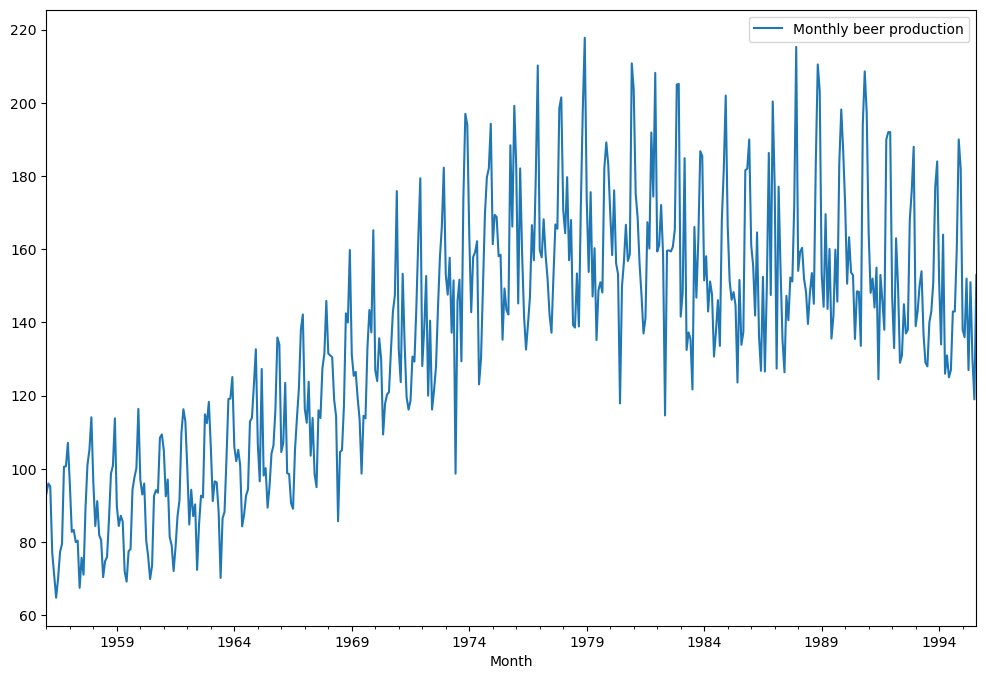

In [60]:
df2.plot()
plt.show()

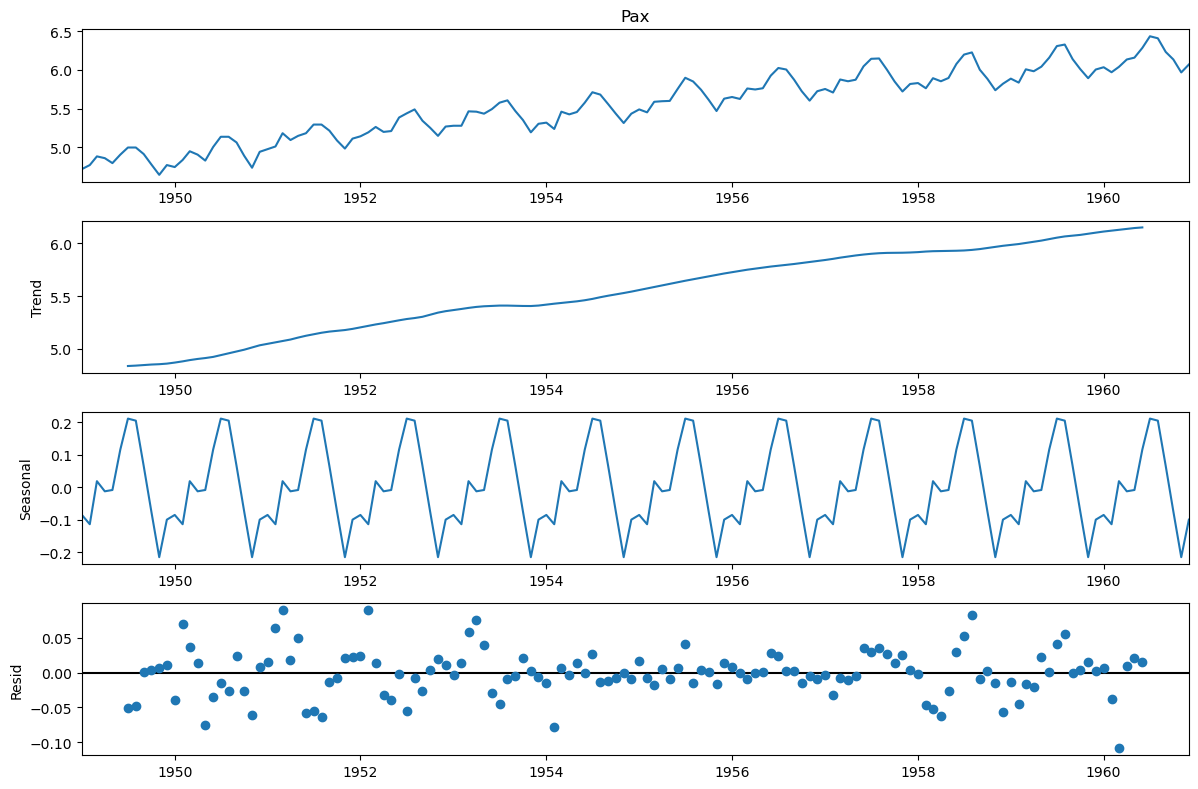

In [61]:
# decomposition - 
#additive - 
df2_add_decompose = seasonal_decompose(df['Pax'],model='additive',period=12)
df2_add_decompose.plot()
plt.show()

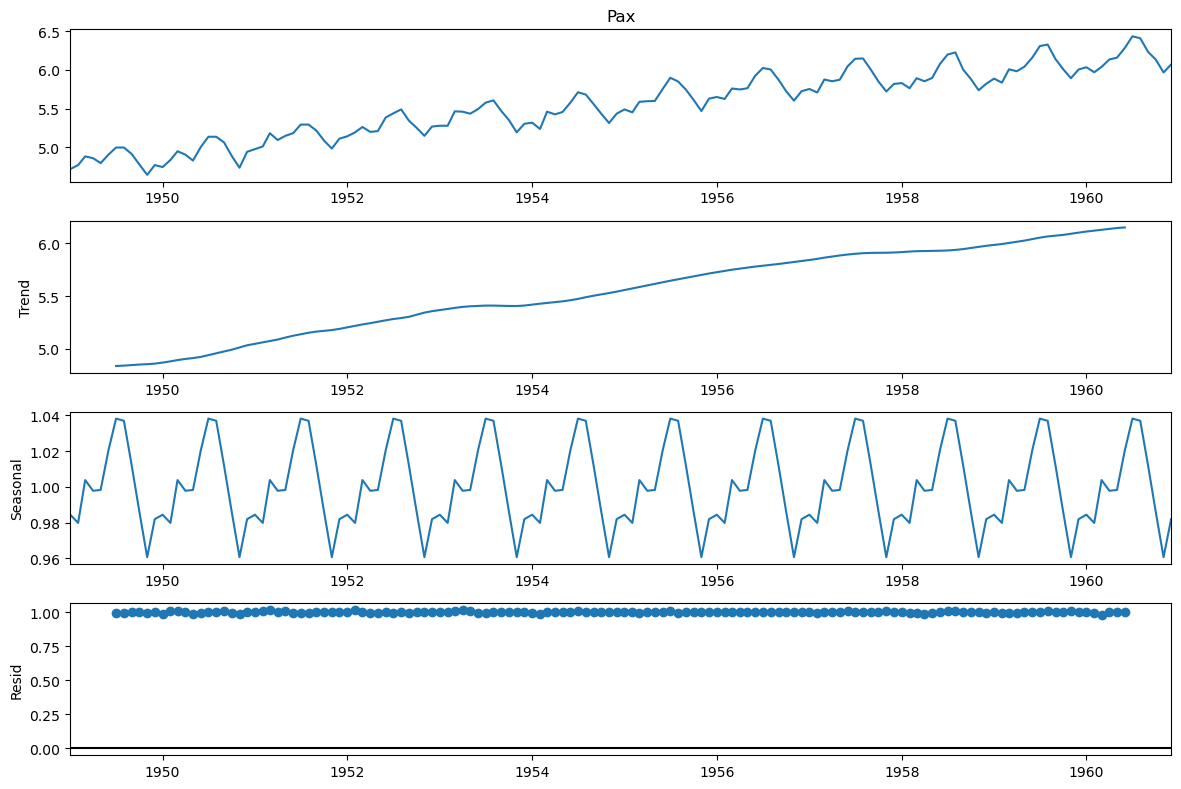

In [62]:
#multiplitive - 
df2_mul_decompose = seasonal_decompose(df['Pax'],model='multiplicative',period=12)
df2_mul_decompose.plot()
plt.show()

In [63]:
# lets inspect each component - 
df2_add_decompose.trend

Year-Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [64]:
df2_add_decompose.seasonal

Year-Month
1949-01-01   -0.085815
1949-02-01   -0.114413
1949-03-01    0.018113
1949-04-01   -0.013046
1949-05-01   -0.008966
                ...   
1960-08-01    0.204512
1960-09-01    0.064836
1960-10-01   -0.075271
1960-11-01   -0.215846
1960-12-01   -0.100315
Name: seasonal, Length: 144, dtype: float64

In [65]:
df2_add_decompose.resid

Year-Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

In [66]:
df2

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


In [ ]:
# Since this is an additive model =
# Observed(yt) = trend(Tt) + Seasonal(St) + Irregular(It) should give actual value

# For multiplicative model = 
# Observed(yt) = trend(Tt) * Seasonal(St) * Irregular(It) should give actual value


In [67]:
df2_log = np.log(df2['Monthly beer production'])
df2_log.head()

Month
1956-01-01    4.534748
1956-02-01    4.564348
1956-03-01    4.555980
1956-04-01    4.345103
1956-05-01    4.261270
Name: Monthly beer production, dtype: float64

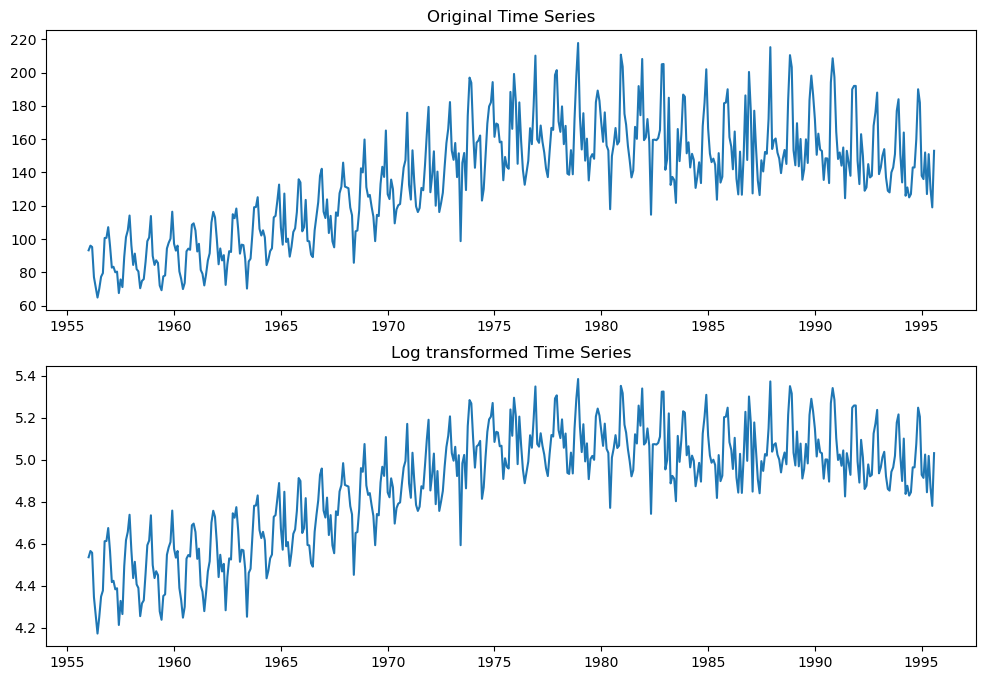

In [68]:
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df2)
plt.subplot(2,1,2)
plt.title('Log transformed Time Series')
plt.plot(df2_log)

### Downsampling - 

In [69]:
df2

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


In [70]:
# # lets change the monthly series to quarterly - 
# dfq = df2.resample('Q').mean()
# dfq

,Monthly beer production
Month,
1956-03-31,94.800000
1956-06-30,70.933333
1956-09-30,75.633333
1956-12-31,102.800000
1957-03-31,87.333333
...,...
1994-09-30,137.666667
1994-12-31,177.333333
1995-03-31,142.000000


### Upsampling - 

In [74]:
# monthly to daily data-
dfd = df2.resample('D').ffill()
dfd

,Monthly beer production
Month,
1956-01-01,93.2
1956-01-02,93.2
1956-01-03,93.2
1956-01-04,93.2
1956-01-05,93.2
...,...
1995-07-28,119.0
1995-07-29,119.0
1995-07-30,119.0


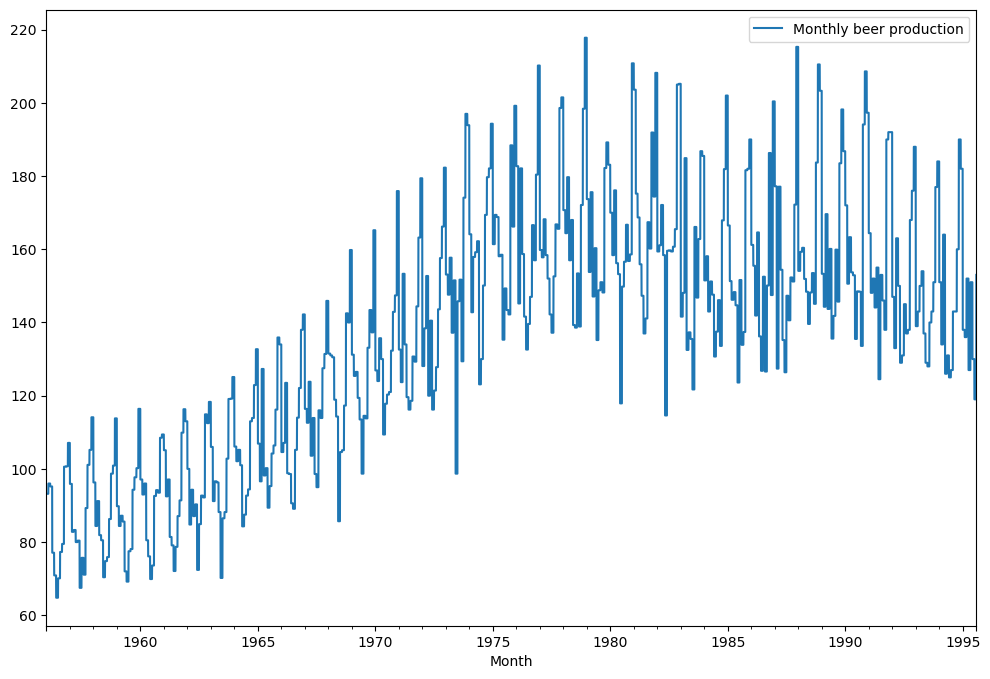

In [73]:
dfd.plot()
plt.show()

In [75]:
dfd['1956-01']

C:\Users\deepak\AppData\Local\Temp\ipykernel_15124\3146897950.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dfd['1956-01']


,Monthly beer production
Month,
1956-01-01,93.2
1956-01-02,93.2
1956-01-03,93.2
1956-01-04,93.2
1956-01-05,93.2
1956-01-06,93.2
1956-01-07,93.2
1956-01-08,93.2
1956-01-09,93.2


In [76]:
# monthly to hourly -
dfh = df2.resample('H').interpolate()
dfh

,Monthly beer production
Month,
1956-01-01 00:00:00,93.200000
1956-01-01 01:00:00,93.203763
1956-01-01 02:00:00,93.207527
1956-01-01 03:00:00,93.211290
1956-01-01 04:00:00,93.215054
...,...
1995-07-31 20:00:00,152.817204
1995-07-31 21:00:00,152.862903
1995-07-31 22:00:00,152.908602


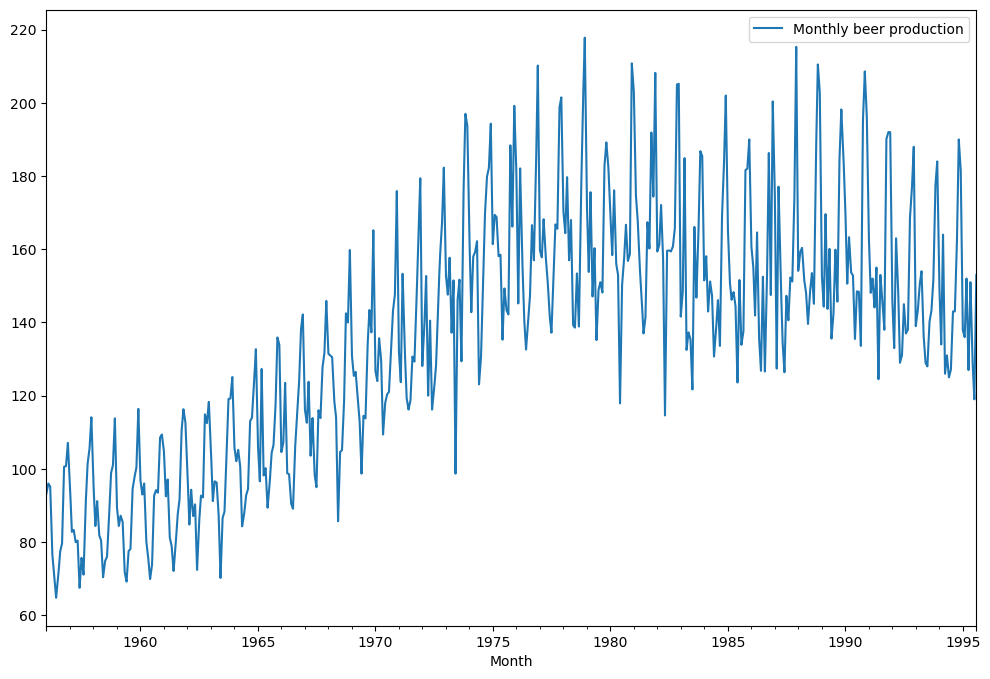

In [77]:
dfh.plot()
plt.show()

In [78]:
# quaterluy to yearly-
dfy = dfq.resample('Y').sum()
dfy

,Monthly beer production
Month,
1956-12-31,344.166667
1957-12-31,348.800000
1958-12-31,351.700000
1959-12-31,350.800000
1960-12-31,361.466667
1961-12-31,374.566667
1962-12-31,381.466667
1963-12-31,396.466667
1964-12-31,418.600000
